# Regresión lineal

In [25]:
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

In [26]:
def derivada_L_w(x, y_pred, y):
    '''
    Calcula el resultado de la derivada de L respecto W
    y_pred = wx+b
    '''
    return 2*x*(y_pred - y)

def derivada_L_b(x, y_pred, y):
    '''
    Calcula el resultado de la derivada de L respecto b
    '''
    return 2*(y_pred - y)

In [27]:
def modelo(x, w, b):
    '''
    Calcula la regresión lineal basada en los parámetros w y b con respecto a x.

    Parámetros:
    x (array-like): Vector de características.
    w (array-like): Vector de pesos.
    b (float): Bias (también conocido como sesgo).

    Retorna:
    array-like: Resultado de la regresión lineal.
    '''

    return w*x + b

## Selección aleatoria de los pesos W y b

In [28]:
w = np.random.default_rng().random()
b = np.random.default_rng().random()

#(Feature, Y)
samples = [(1, 2), (2, 4), (3, 6), (4, 8)]

print(f"Valores de W = {w} y b = {b}")
for (x, y) in samples:
    y_pred = modelo(x, w, b)
    print(f"Predición del modelo = {y_pred} y su etiqueta  = {y}")

Valores de W = 0.7355329669055293 y b = 0.5974697187399783
Predición del modelo = 1.3330026856455075 y su etiqueta  = 2
Predición del modelo = 2.068535652551037 y su etiqueta  = 4
Predición del modelo = 2.8040686194565665 y su etiqueta  = 6
Predición del modelo = 3.5396015863620955 y su etiqueta  = 8


## Gráfica del modelo lineal

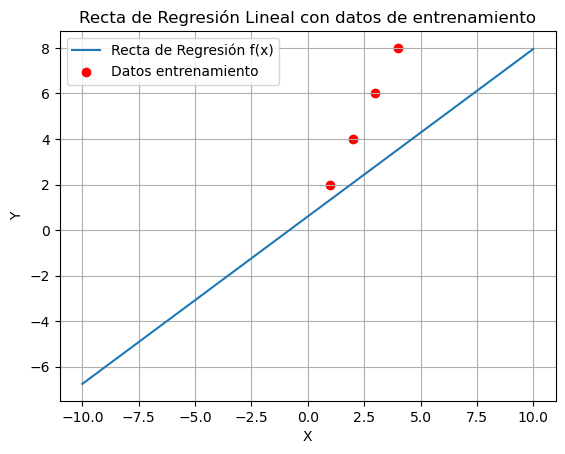

In [29]:
def plotRegresion(w, b):
    # Generar datos para graficar
    x_data = np.linspace(-10, 10, 100)  # Genera 100 puntos entre -10 y 10

    # Calcular los valores de y utilizando el modelo
    y_data = modelo(x_data, w, b)

    # Puntos de muestra
    samples = [(1, 2), (2, 4), (3, 6), (4, 8)]
    sample_x, sample_y = zip(*samples)

    # Graficar la recta generada por el modelo
    plt.plot(x_data, y_data, label='Recta de Regresión f(x)')
    plt.scatter(sample_x, sample_y, color='red', label='Datos entrenamiento')  # Agregar puntos de muestra
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Recta de Regresión Lineal con datos de entrenamiento')
    plt.legend()
    plt.grid(True)
    plt.show()
plotRegresion(w, b)

## Calculo del error de los samples de entrenamiento

In [30]:
def MSE(y_pred, y):
    return (y_pred - y)**2

In [31]:
errorBySample = []
for (x, y) in samples:
    y_pred = modelo(x, w, b)
    error = MSE(y_pred, y)
    errorBySample.append(error)
    print(f"Predición del modelo = {y_pred} y su etiqueta  = {y}, MSE {error}")

Predición del modelo = 1.3330026856455075 y su etiqueta  = 2, MSE 0.4448854173561057
Predición del modelo = 2.068535652551037 y su etiqueta  = 4, MSE 3.7305545254664483
Predición del modelo = 2.8040686194565665 y su etiqueta  = 6, MSE 10.213977389142256
Predición del modelo = 3.5396015863620955 y su etiqueta  = 8, MSE 19.895154008383532


In [32]:
def promedio(list):
    return np.mean(list)

## Actualización de parametros después de todos los datos de entrenamiento

In [33]:
errorBySample = []
derivadas_w = []
derivadas_b = []
alfa = 0.0005
#Recorrer los samples
for (x, y) in samples:
    #Predecir con mi modelo
    y_pred = modelo(x, w, b)
    #Calcular el error respecto a la etiqueta real.
    error = MSE(y_pred, y)
    errorBySample.append(error)
    #Calculo la derivada de L con respecto a W y b para este sample y las guardo
    derivadaW = derivada_L_w(x, y_pred, y)
    derivadas_w.append(derivadaW)
    derivadaB = derivada_L_b(x, y_pred, y)
    derivadas_b.append(derivadaB)
    print(f"Predición del modelo = {y_pred} y su etiqueta  = {y}, MSE {error}, derivada W {derivadaW:.2F}, derivada b {derivadaB:.2F}")

#A este punto terminamos con el conjunto de datos de entrenamiento y ya calculamos todas las derivadas para cada sample además del error.
    
#Calculamos el promedio de derivadas de W y actualizamos el valor
promedio_derivada_w = promedio(derivadas_w)
w = w - alfa*promedio_derivada_w

#Calculamos el promedio de derivadas de b y actualizamos el valor
promedio_derivada_b = promedio(derivadas_b)
b = b - alfa*promedio_derivada_b
costError = promedio(errorBySample)
print(f"Valor de función de coste = {costError:.4F}, nuevo valor de W = {w:.2F}, B = {b:.2F}")

Predición del modelo = 1.3330026856455075 y su etiqueta  = 2, MSE 0.4448854173561057, derivada W -1.33, derivada b -1.33
Predición del modelo = 2.068535652551037 y su etiqueta  = 4, MSE 3.7305545254664483, derivada W -7.73, derivada b -3.86
Predición del modelo = 2.8040686194565665 y su etiqueta  = 6, MSE 10.213977389142256, derivada W -19.18, derivada b -6.39
Predición del modelo = 3.5396015863620955 y su etiqueta  = 8, MSE 19.895154008383532, derivada W -35.68, derivada b -8.92
Valor de función de coste = 8.5711, nuevo valor de W = 0.74, B = 0.60


## Epoch
La cantidad de veces que recorremos el set de datos de entrenamiento para ajustar nuestro modelo.

Epoca 0, valor de función de perdida (Loss Function) = 3.72333, nuevo valor de W = 1.12116, B = 0.71929


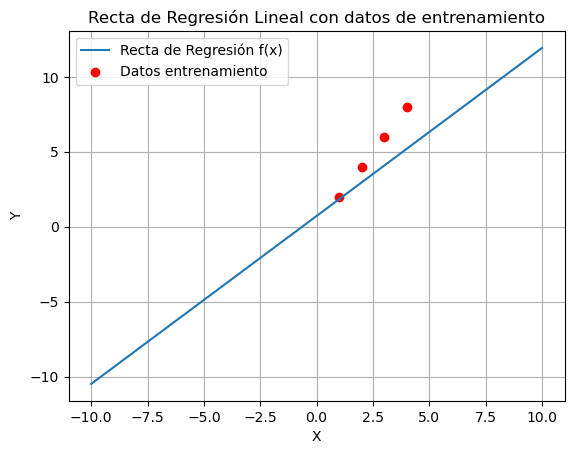

Epoca 8, valor de función de perdida (Loss Function) = 1.02427, nuevo valor de W = 1.41033, B = 0.80551


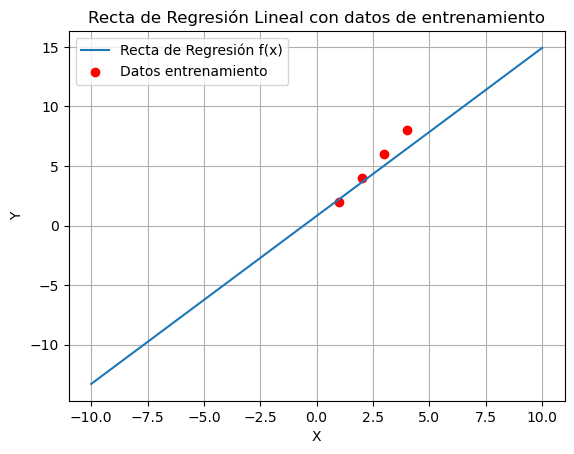

Epoca 16, valor de función de perdida (Loss Function) = 0.35305, nuevo valor de W = 1.55609, B = 0.84310


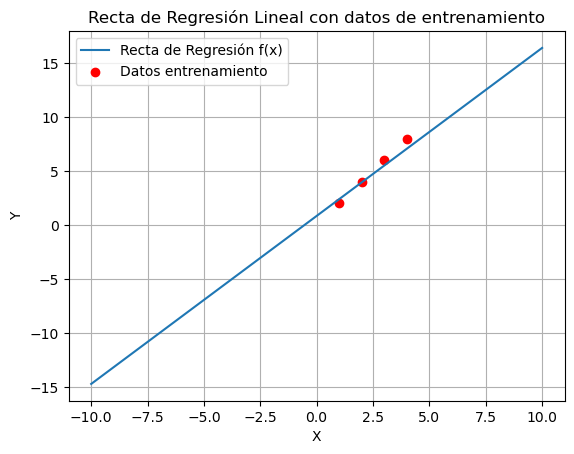

Epoca 24, valor de función de perdida (Loss Function) = 0.18437, nuevo valor de W = 1.63044, B = 0.85655


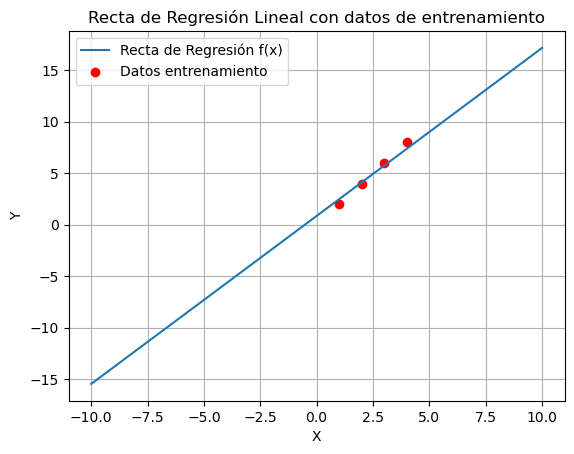

Epoca 32, valor de función de perdida (Loss Function) = 0.14028, nuevo valor de W = 1.66922, B = 0.85804


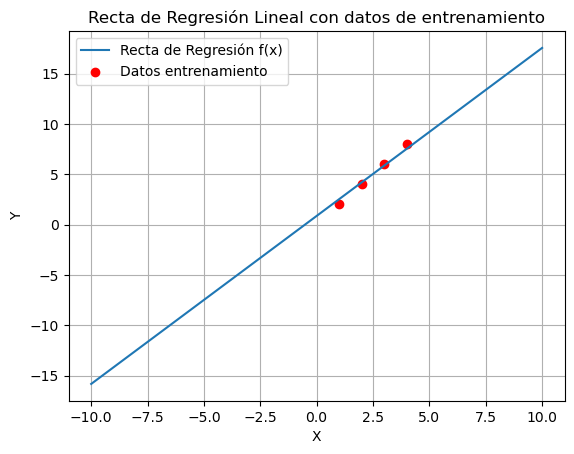

Epoca 40, valor de función de perdida (Loss Function) = 0.12711, nuevo valor de W = 1.69028, B = 0.85364


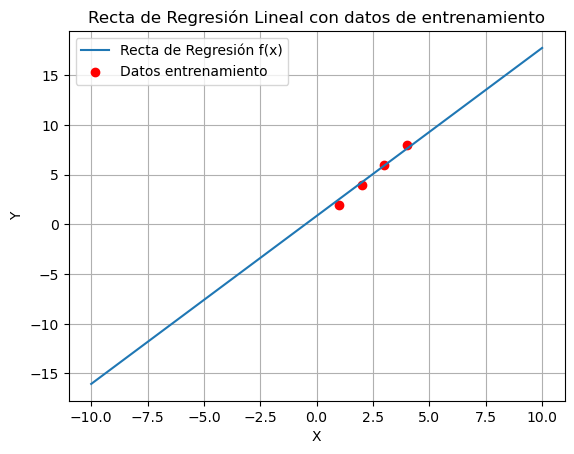

Epoca 48, valor de función de perdida (Loss Function) = 0.12166, nuevo valor de W = 1.70248, B = 0.84636


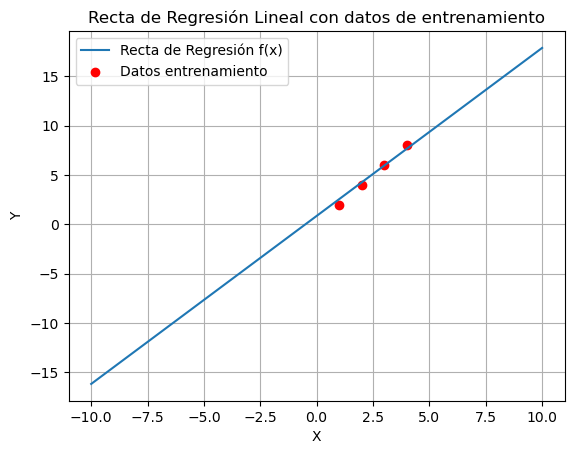

Epoca 56, valor de función de perdida (Loss Function) = 0.11817, nuevo valor de W = 1.71027, B = 0.83772


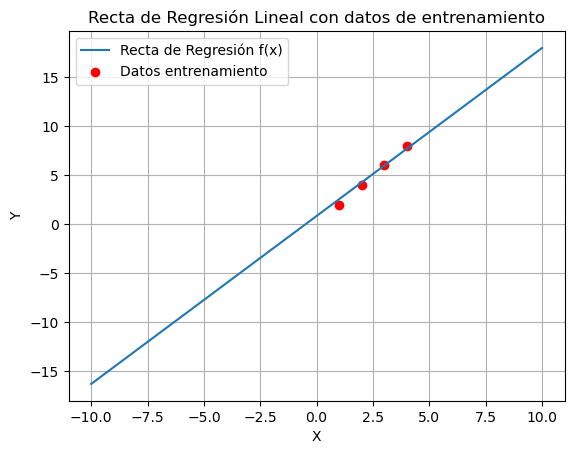

Epoca 64, valor de función de perdida (Loss Function) = 0.11523, nuevo valor de W = 1.71583, B = 0.82846


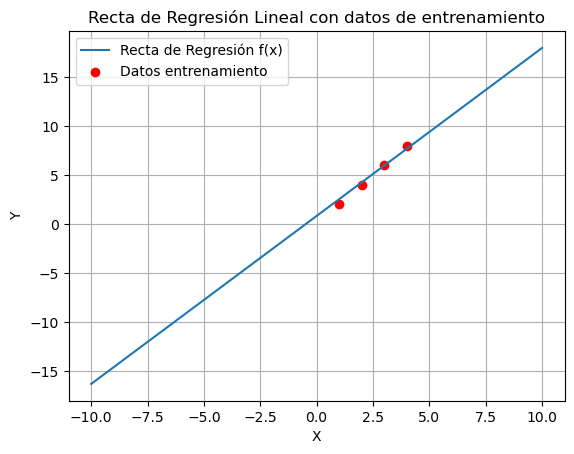

Epoca 72, valor de función de perdida (Loss Function) = 0.11246, nuevo valor de W = 1.72027, B = 0.81895


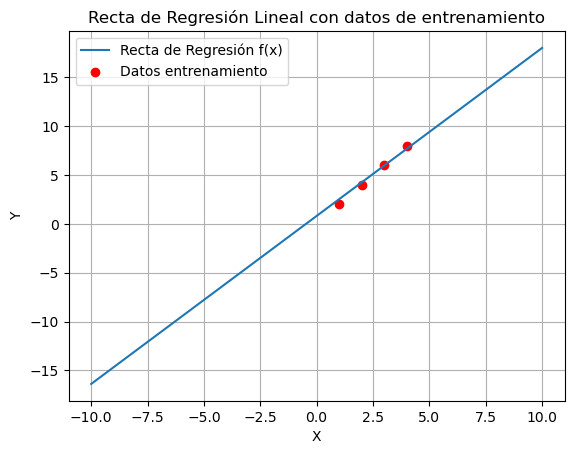

Epoca 80, valor de función de perdida (Loss Function) = 0.10979, nuevo valor de W = 1.72412, B = 0.80937


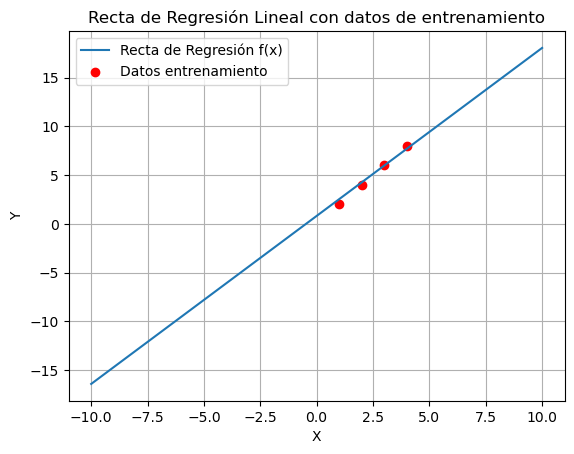

Epoca 88, valor de función de perdida (Loss Function) = 0.10718, nuevo valor de W = 1.72767, B = 0.79982


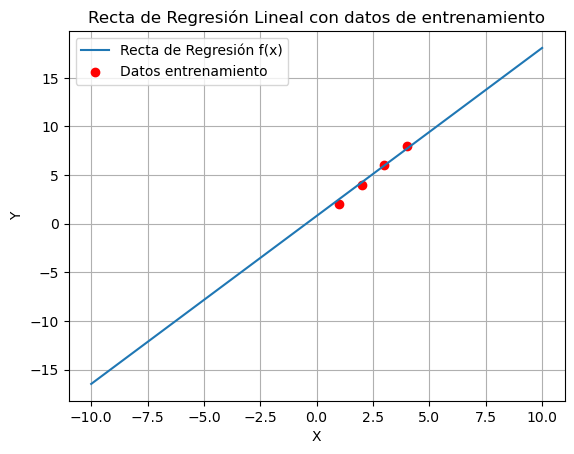

Epoca 96, valor de función de perdida (Loss Function) = 0.10465, nuevo valor de W = 1.73104, B = 0.79033


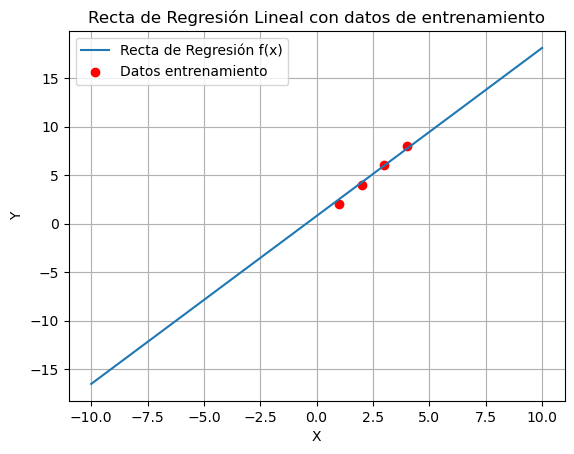

Epoca 104, valor de función de perdida (Loss Function) = 0.10217, nuevo valor de W = 1.73431, B = 0.78094


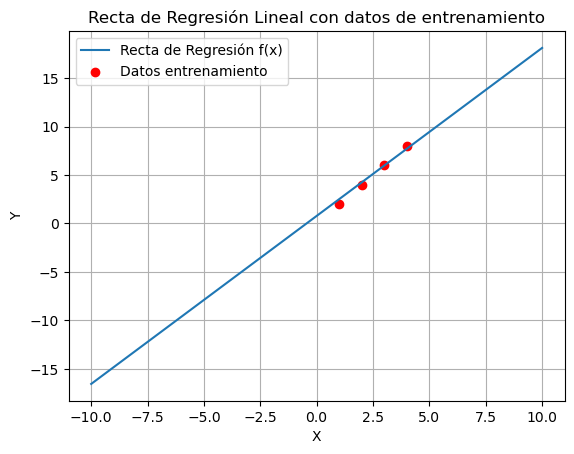

Epoca 112, valor de función de perdida (Loss Function) = 0.09975, nuevo valor de W = 1.73751, B = 0.77165


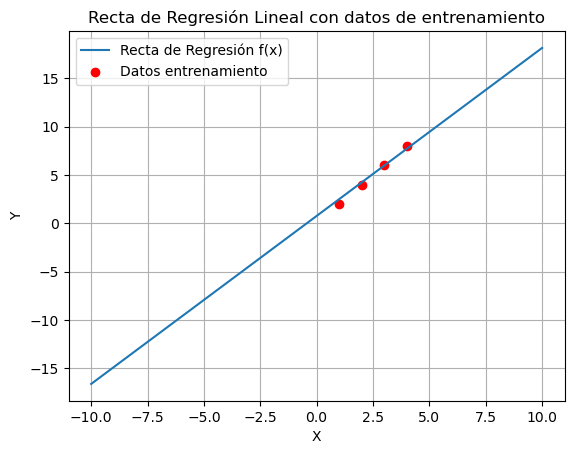

Epoca 120, valor de función de perdida (Loss Function) = 0.09738, nuevo valor de W = 1.74065, B = 0.76246


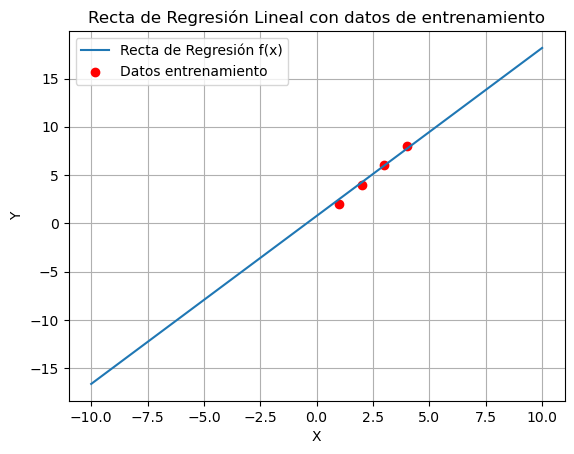

Epoca 128, valor de función de perdida (Loss Function) = 0.09508, nuevo valor de W = 1.74375, B = 0.75338


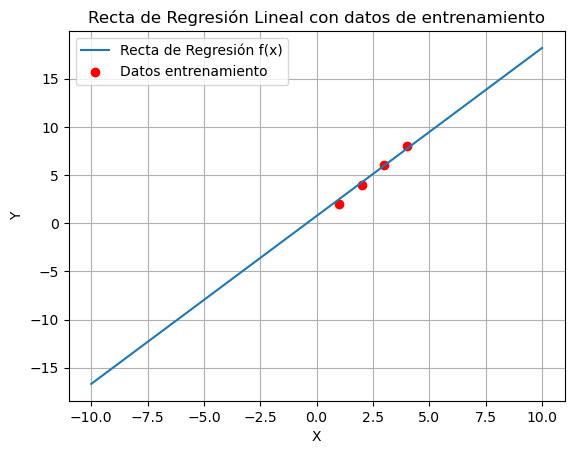

Epoca 136, valor de función de perdida (Loss Function) = 0.09283, nuevo valor de W = 1.74681, B = 0.74441


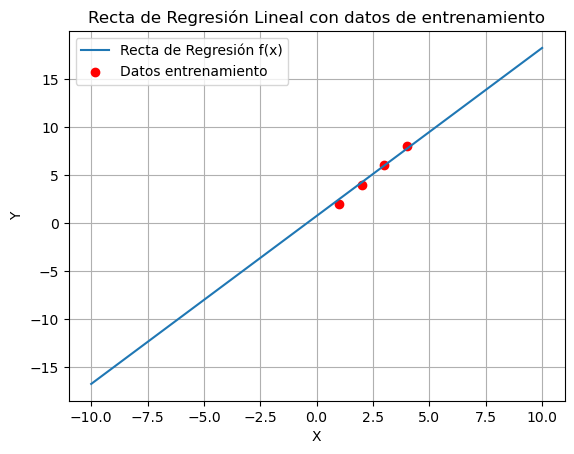

Epoca 144, valor de función de perdida (Loss Function) = 0.09063, nuevo valor de W = 1.74983, B = 0.73554


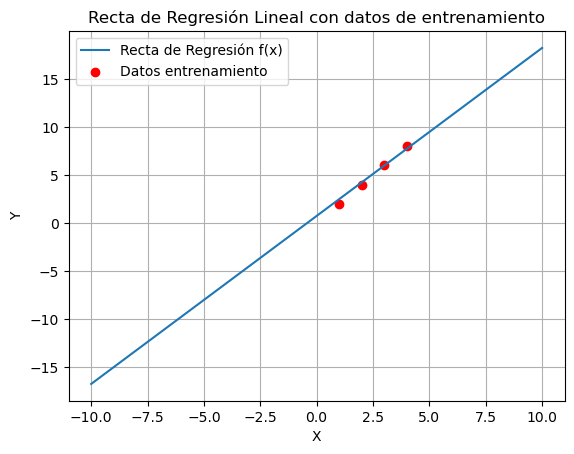

Epoca 152, valor de función de perdida (Loss Function) = 0.08848, nuevo valor de W = 1.75281, B = 0.72678


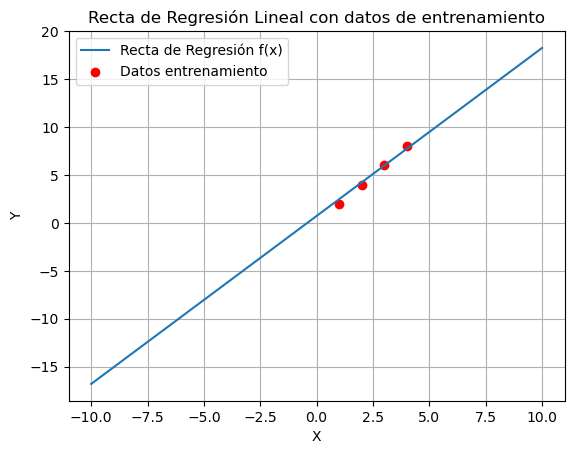

Epoca 160, valor de función de perdida (Loss Function) = 0.08639, nuevo valor de W = 1.75575, B = 0.71812


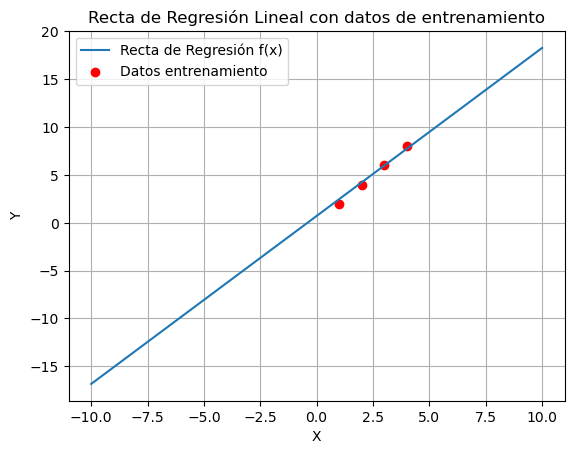

Epoca 168, valor de función de perdida (Loss Function) = 0.08434, nuevo valor de W = 1.75866, B = 0.70956


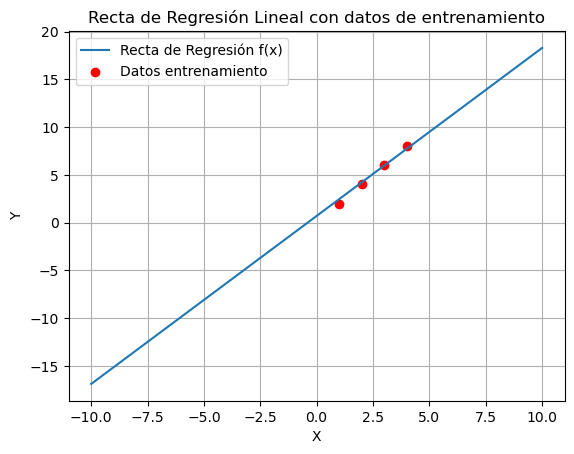

Epoca 176, valor de función de perdida (Loss Function) = 0.08234, nuevo valor de W = 1.76154, B = 0.70111


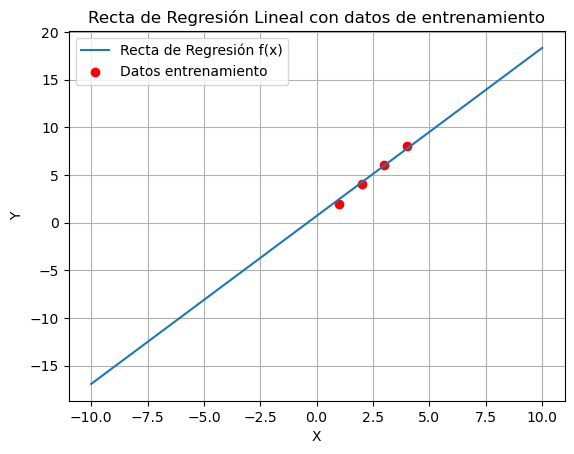

Epoca 184, valor de función de perdida (Loss Function) = 0.08039, nuevo valor de W = 1.76438, B = 0.69276


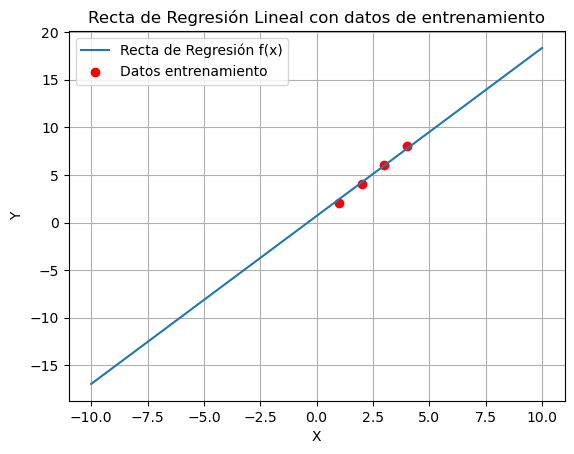

Epoca 192, valor de función de perdida (Loss Function) = 0.07849, nuevo valor de W = 1.76718, B = 0.68450


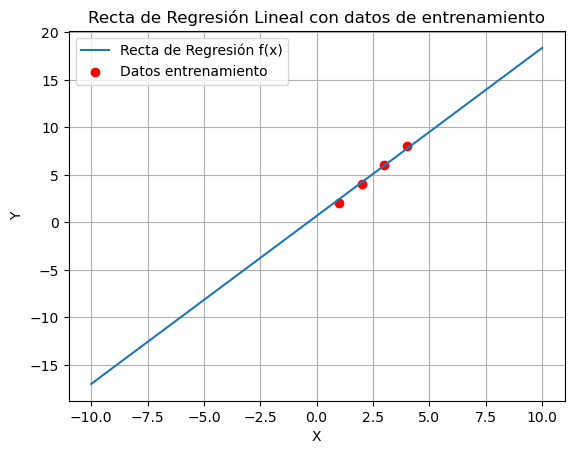

Epoca 200, valor de función de perdida (Loss Function) = 0.07663, nuevo valor de W = 1.76996, B = 0.67635


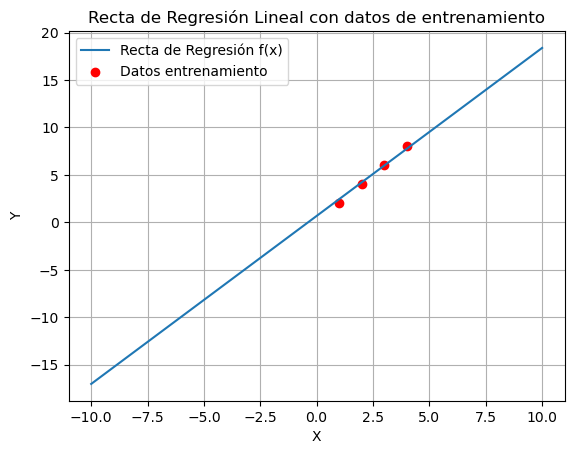

Epoca 208, valor de función de perdida (Loss Function) = 0.07481, nuevo valor de W = 1.77270, B = 0.66829


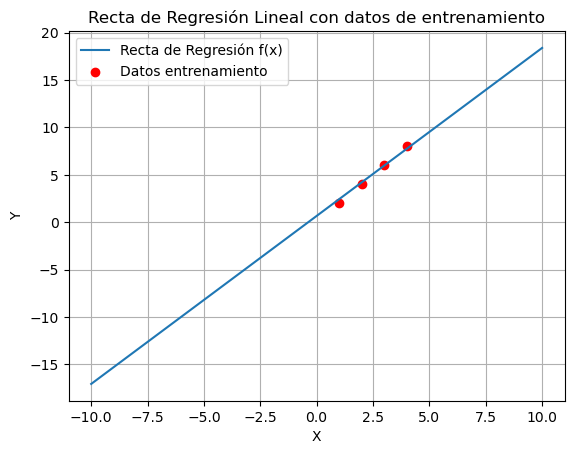

Epoca 216, valor de función de perdida (Loss Function) = 0.07304, nuevo valor de W = 1.77541, B = 0.66033


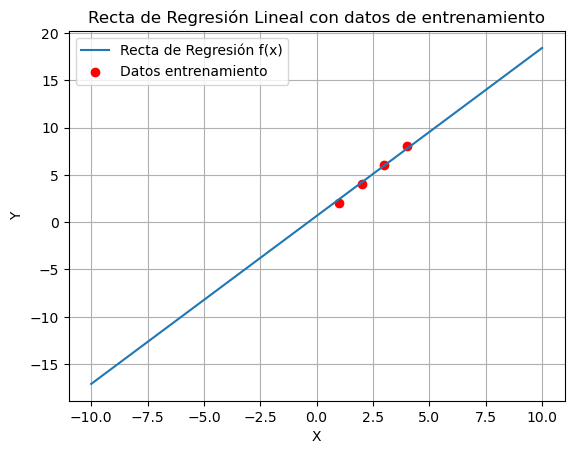

Epoca 224, valor de función de perdida (Loss Function) = 0.07131, nuevo valor de W = 1.77808, B = 0.65246


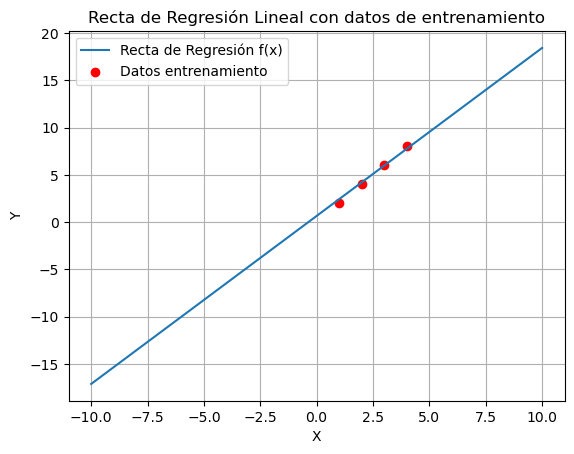

Epoca 232, valor de función de perdida (Loss Function) = 0.06962, nuevo valor de W = 1.78073, B = 0.64469


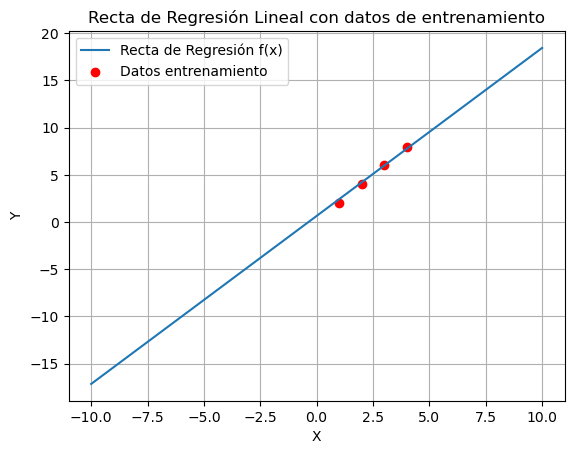

Epoca 240, valor de función de perdida (Loss Function) = 0.06797, nuevo valor de W = 1.78334, B = 0.63701


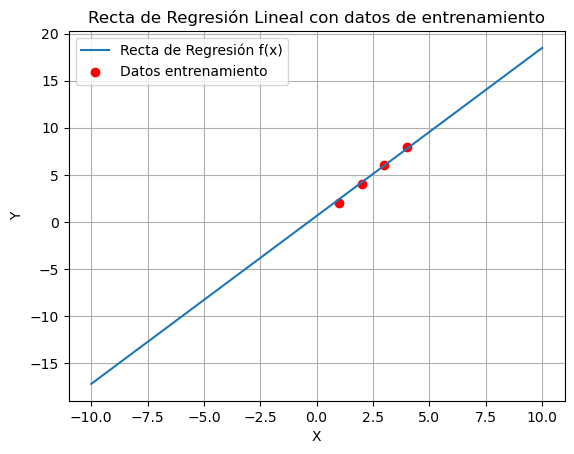

Epoca 248, valor de función de perdida (Loss Function) = 0.06636, nuevo valor de W = 1.78592, B = 0.62942


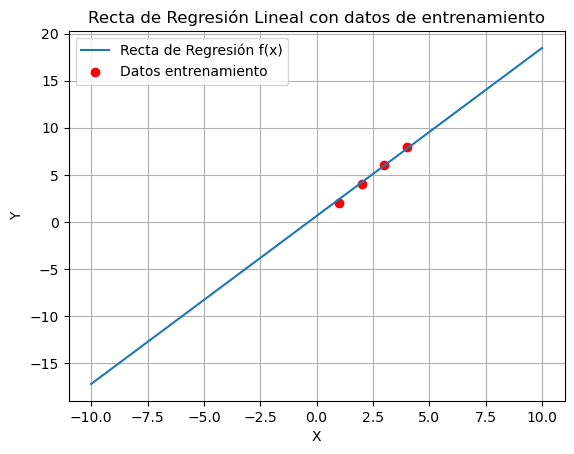

Epoca 256, valor de función de perdida (Loss Function) = 0.06479, nuevo valor de W = 1.78847, B = 0.62192


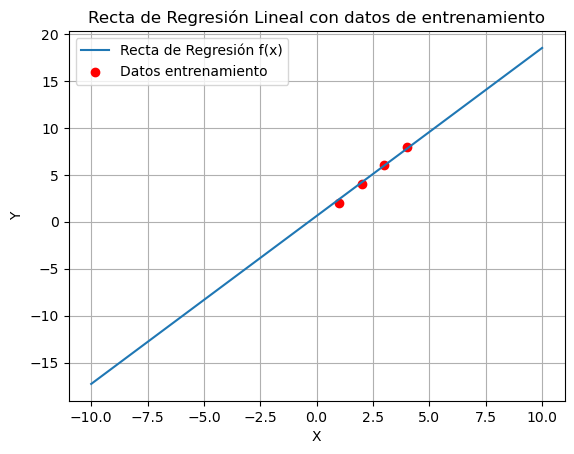

Epoca 264, valor de función de perdida (Loss Function) = 0.06326, nuevo valor de W = 1.79099, B = 0.61452


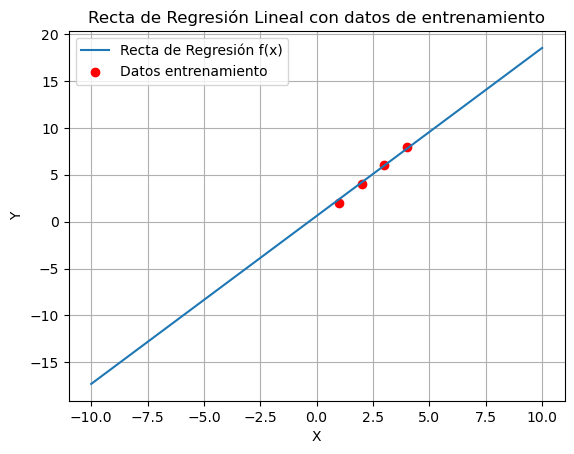

Epoca 272, valor de función de perdida (Loss Function) = 0.06176, nuevo valor de W = 1.79348, B = 0.60719


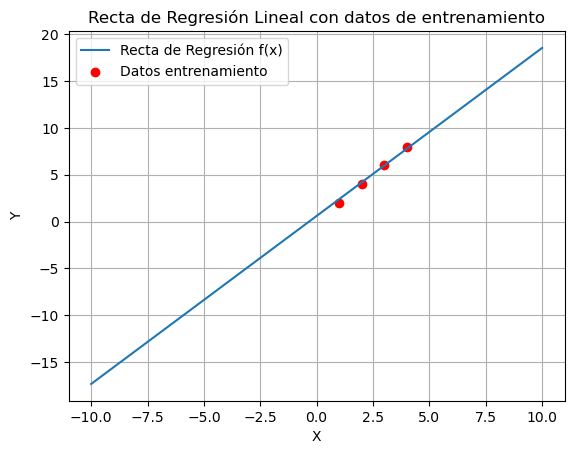

Epoca 280, valor de función de perdida (Loss Function) = 0.06030, nuevo valor de W = 1.79594, B = 0.59996


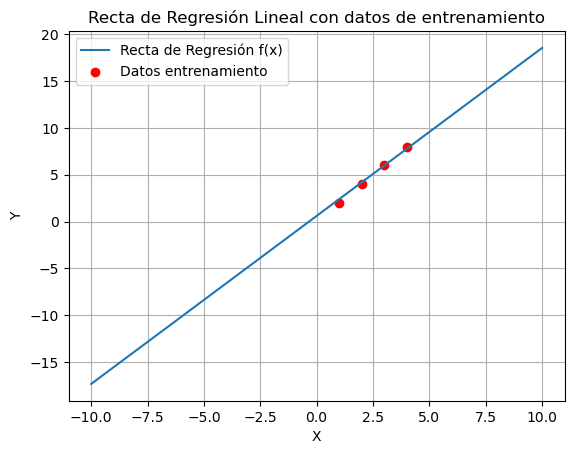

Epoca 288, valor de función de perdida (Loss Function) = 0.05887, nuevo valor de W = 1.79837, B = 0.59281


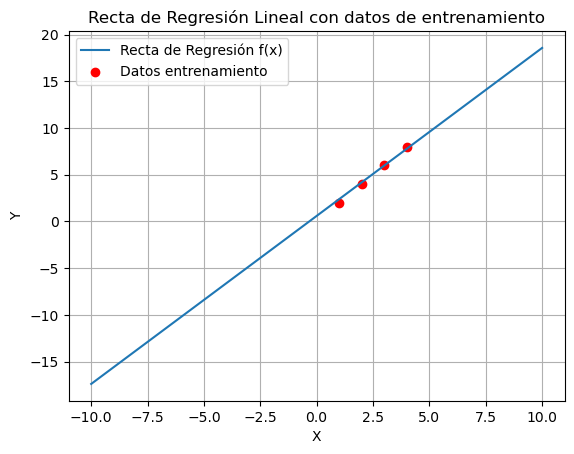

Epoca 296, valor de función de perdida (Loss Function) = 0.05747, nuevo valor de W = 1.80077, B = 0.58575


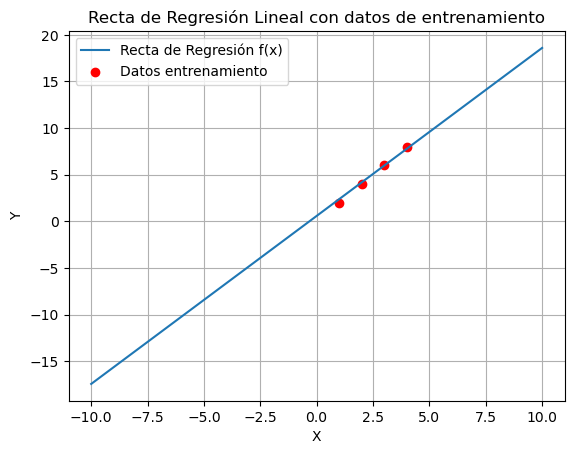

Epoca 304, valor de función de perdida (Loss Function) = 0.05611, nuevo valor de W = 1.80315, B = 0.57877


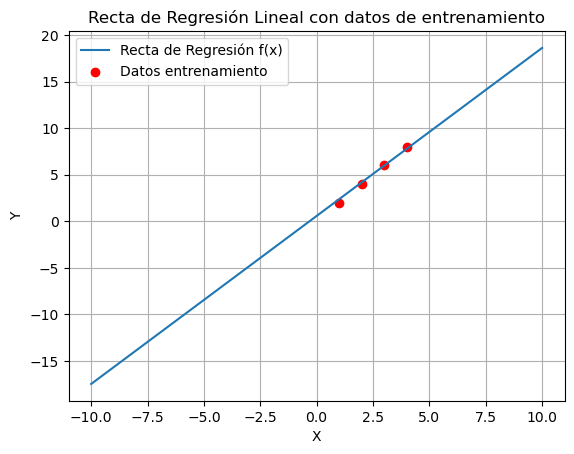

Epoca 312, valor de función de perdida (Loss Function) = 0.05478, nuevo valor de W = 1.80549, B = 0.57188


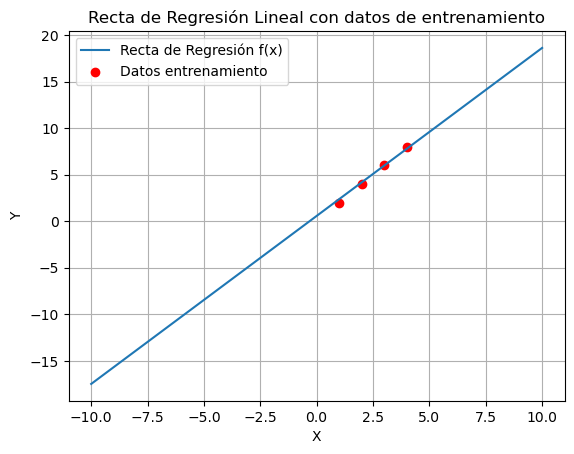

Epoca 320, valor de función de perdida (Loss Function) = 0.05349, nuevo valor de W = 1.80781, B = 0.56507


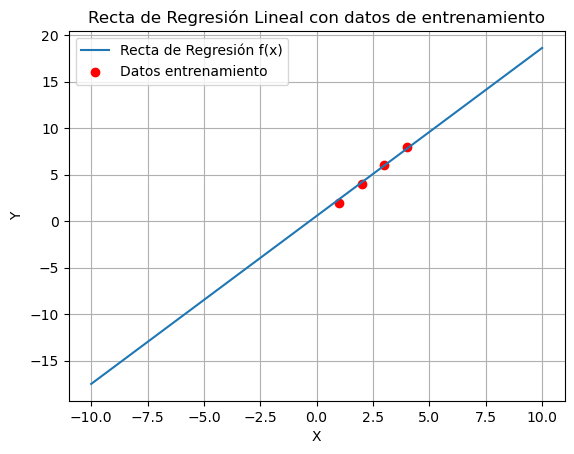

Epoca 328, valor de función de perdida (Loss Function) = 0.05222, nuevo valor de W = 1.81010, B = 0.55833


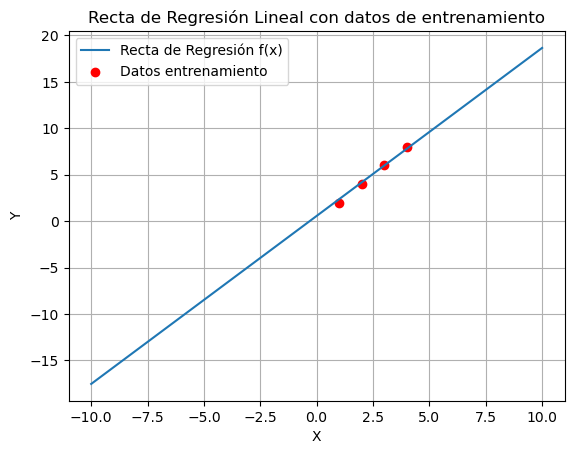

Epoca 336, valor de función de perdida (Loss Function) = 0.05098, nuevo valor de W = 1.81236, B = 0.55168


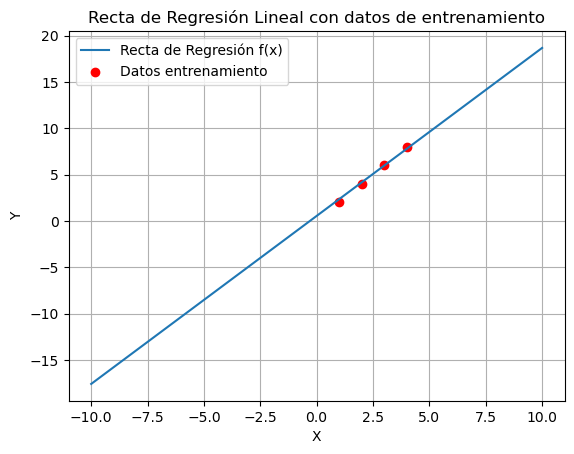

Epoca 344, valor de función de perdida (Loss Function) = 0.04978, nuevo valor de W = 1.81460, B = 0.54511


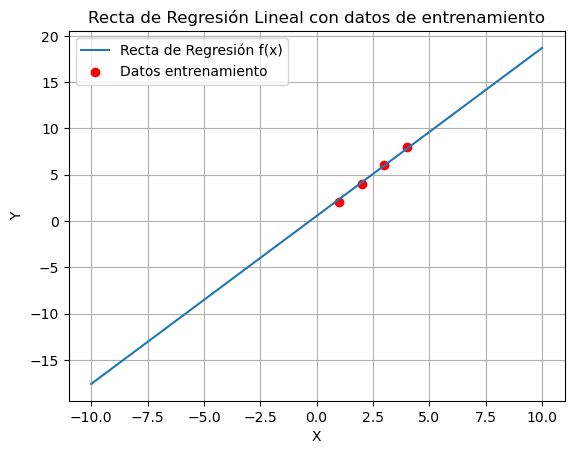

Epoca 352, valor de función de perdida (Loss Function) = 0.04860, nuevo valor de W = 1.81680, B = 0.53862


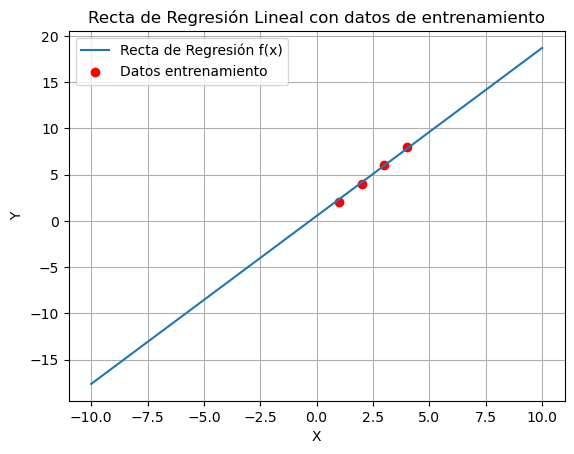

Epoca 360, valor de función de perdida (Loss Function) = 0.04745, nuevo valor de W = 1.81899, B = 0.53220


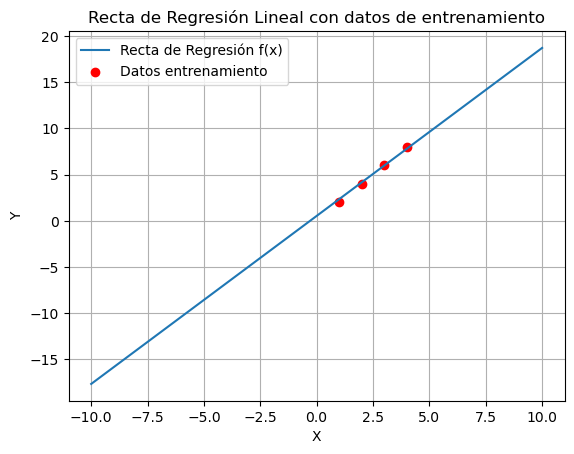

Epoca 368, valor de función de perdida (Loss Function) = 0.04632, nuevo valor de W = 1.82114, B = 0.52586


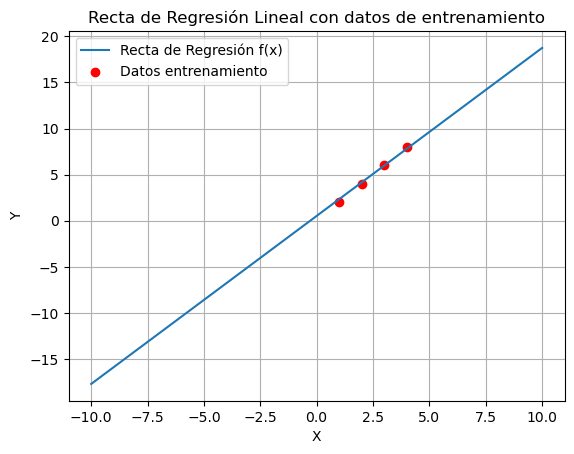

Epoca 376, valor de función de perdida (Loss Function) = 0.04523, nuevo valor de W = 1.82327, B = 0.51960


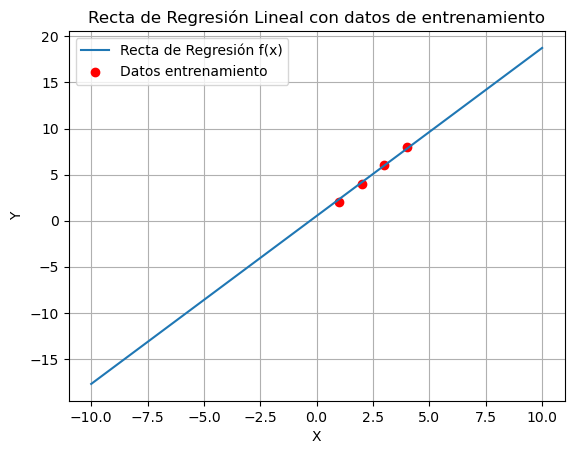

Epoca 384, valor de función de perdida (Loss Function) = 0.04415, nuevo valor de W = 1.82538, B = 0.51341


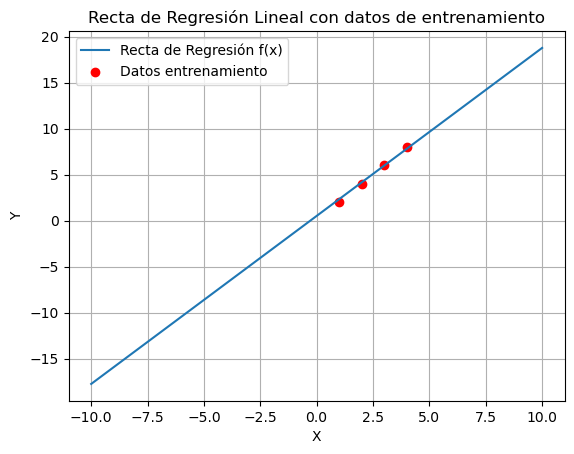

Epoca 392, valor de función de perdida (Loss Function) = 0.04311, nuevo valor de W = 1.82746, B = 0.50729


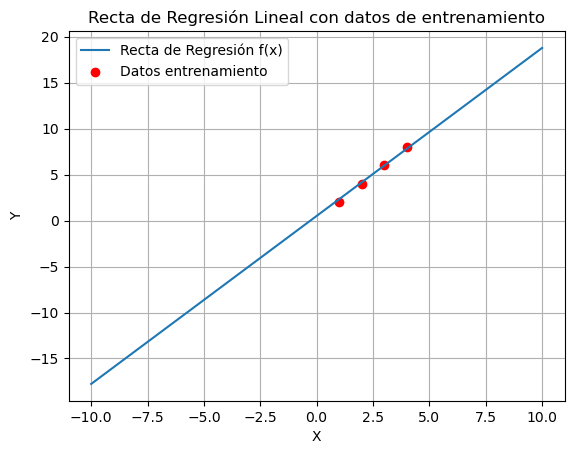

In [36]:
errorBySample = []
derivadas_w = []
derivadas_b = []
epochs = 400
plotEvery = epochs//50
alfa = 0.005
for epoch in range(epochs):
    for (x, y) in samples:
        y_pred = modelo(x, w, b)
        error = MSE(y_pred, y)
        errorBySample.append(error)
        derivadaW = derivada_L_w(x, y_pred, y)
        derivadas_w.append(derivadaW)
        derivadaB = derivada_L_b(x, y_pred, y)
        derivadas_b.append(derivadaB)
        #print(f"Predición del modelo = {y_pred} y su etiqueta  = {y}, MSE {error}, derivada W {derivadaW:.2F}, derivada b {derivadaB:.2F}")

    promedio_derivada_w = promedio(derivadas_w)
    w = w - alfa*promedio_derivada_w

    promedio_derivada_b = promedio(derivadas_b)
    b = b - alfa*promedio_derivada_b
    costError = promedio(errorBySample)

    if (epoch % plotEvery) == 0:
        print(f"Epoca {epoch}, valor de función de perdida (Loss Function) = {costError:.5F}, nuevo valor de W = {w:.5F}, B = {b:.5F}")
        plotRegresion(w, b)
    
    #Reiniciamos
    errorBySample = []
    derivadas_w = []
    derivadas_b = []

In [37]:
# Evaluando el modelo
for (x, y) in samples:
        y_pred = modelo(x, w, b)
        error = MSE(y_pred, y)
        errorBySample.append(error)
        derivadaW = derivada_L_w(x, y_pred, y)
        derivadas_w.append(derivadaW)
        derivadaB = derivada_L_b(x, y_pred, y)
        derivadas_b.append(derivadaB)
        print(f"Predición del modelo = {y_pred} y su etiqueta  = {y}, MSE {error}, derivada W {derivadaW:.2F}, derivada b {derivadaB:.2F}")

Predición del modelo = 2.331256959220065 y su etiqueta  = 2, MSE 0.10973117303172376, derivada W 0.66, derivada b 0.66
Predición del modelo = 4.160516681895768 y su etiqueta  = 4, MSE 0.025765605166827087, derivada W 0.64, derivada b 0.32
Predición del modelo = 5.9897764045714705 y su etiqueta  = 6, MSE 0.00010452190348624855, derivada W -0.06, derivada b -0.02
Predición del modelo = 7.819036127247173 y su etiqueta  = 8, MSE 0.03274792324170124, derivada W -1.45, derivada b -0.36
